---
# 프로젝트 명: MLB 데이터를 활용한 회귀모델 생성 및 결과분석

## 데이터 출처: [Moneyball | Kaggle](https://www.kaggle.com/wduckett/moneyball-mlb-stats-19622012)

## 프로젝트 목표
    MLB Moneyball 데이터와 강의 실습시간에 배운 내용으로 회귀분석 및 로지스틱회귀분석 모델 생성
        - 한 시즌 동안 승리한 횟수(W) 예측 회귀분석 모델, 플레이오프 진출 여부(Playoffs) 결정 로지스틱회귀분석 모델 생성
    독립변수들과 종속변수와의 인과관계를 고려하여 모델에 영향력이 큰 유의미한 독립변수 찾기
        - 기존의 독립변수를 조합하여 만든 변수로 예측해보기
        - 변수선택법(전진선택법, 후진소거법)으로 최적의 변수 조합 찾기
        - 다중공선성 문제 확인
    회귀모델의 결과를 해석하는 방법 습득

## 프로젝트 구성
    - 시각화를 통한 데이터의 이해
    - RS를 독립변수로 W를 예측하는 단순선형회귀 모델 생성
    - (RS-RA)를 독립변수로 W를 예측하는 단순선형회귀 모델 생성
    - 회귀분석 결과의 해석
    - 모든 변수를 활용한 다중회귀분석 및 다중공선성 문제
    - 로지스틱회귀 모델 생성
    - 변수 선택법으로 로지스틱회귀분석 정확도 올리기

## 프로젝트 과정
    - 데이터의 간단한 시각화에서부터 회귀분석과 로지스틱회귀분석 문제 해결까지 강의 실습 내용 확인
    - 모델 생성 및 해석에 대한 내용에 집중하기 위해서 학습데이터와 테스트데이터를 구분하지 않고 진행
    - 강의 실습 시간에 다룬 자료를 이용해서 코드 작성

- 작성자: 김민중 감수자

---

### Context

In the early 2000s, Billy Beane and Paul DePodesta worked for the Oakland Athletics. While there, they literally changed the game of baseball. They didn't do it using a bat or glove, and they certainly didn't do it by throwing money at the issue; in fact, money was the issue. They didn't have enough of it, but they were still expected to keep up with teams that had much deeper pockets. This is where Statistics came riding down the hillside on a white horse to save the day. This data set contains some of the information that was available to Beane and DePodesta in the early 2000s, and it can be used to better understand their methods.

### Content

This data set contains a set of variables that Beane and DePodesta focused heavily on. They determined that stats like on-base percentage (OBP) and slugging percentage (SLG) were very important when it came to scoring runs, however they were largely undervalued by most scouts at the time. This translated to a gold mine for Beane and DePodesta. Since these players weren't being looked at by other teams, they could recruit these players on a small budget. The variables are as follows:

- Team, 팀
- League, 리그
- Year, 연도
- Runs Scored (RS), 득점 수
- Runs Allowed (RA), 실점 수
- Wins (W), 승리 횟수
- On-Base Percentage (OBP), 출루율
- Slugging Percentage (SLG), 장타율
- Batting Average (BA), 타율
- Playoffs (binary), 플레이오프 진출 여부
- RankSeason, 시즌 순위
- RankPlayoffs 플레이오프 순위
- Games Played (G), 경기 수
- Opponent On-Base Percentage (OOBP), 도루 허용률
- Opponent Slugging Percentage (OSLG), 피장타율

### [Baseball statistics](https://en.wikipedia.org/wiki/Baseball_statistics)을 살펴보면 각 변수의 정확한 의미를 파악할 수 있다.

# 아래 코드를 실행해주세요.

In [1]:
# 참고: 프로젝트 출제자의 Python 및 주요 라이브러리 버전

import pandas as pd 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sys

print("python version: ", sys.version)
print("pandas version: ", pd.__version__)
print("statsmodels version: ", sm.__version__)
print("numpy version: ", np.__version__)

%matplotlib inline

python version:  3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
pandas version:  0.25.1
statsmodels version:  0.10.1
numpy version:  1.16.5


In [2]:
# Kaggle의 정책상 프로젝트 참여자는 Kaggle에 직접 로그인해서 자료를 다운로드하는 것을 권합니다.
# moneyball = pd.read_csv("https://mjgim-fc.s3.ap-northeast-2.amazonaws.com/baseball.csv", encoding="utf8")

# 데이터 불러오기(자료는 data 폴더에 있음)
moneyball = pd.read_csv("./data/baseball.csv", encoding="utf8")
moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# 데이터의 간단한 정보 파악(na의 개수 및 데이터 타입)
moneyball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
Team            1232 non-null object
League          1232 non-null object
Year            1232 non-null int64
RS              1232 non-null int64
RA              1232 non-null int64
W               1232 non-null int64
OBP             1232 non-null float64
SLG             1232 non-null float64
BA              1232 non-null float64
Playoffs        1232 non-null int64
RankSeason      244 non-null float64
RankPlayoffs    244 non-null float64
G               1232 non-null int64
OOBP            420 non-null float64
OSLG            420 non-null float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [5]:
# na가 있는 컬럼인 RankSeason, RankPlayoffs을 제거(프로젝트에서 사용 안 함)
moneyball = moneyball.dropna(axis=1)
moneyball.info()

# 1232개의 object와 11개의 변수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 11 columns):
Team        1232 non-null object
League      1232 non-null object
Year        1232 non-null int64
RS          1232 non-null int64
RA          1232 non-null int64
W           1232 non-null int64
OBP         1232 non-null float64
SLG         1232 non-null float64
BA          1232 non-null float64
Playoffs    1232 non-null int64
G           1232 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 106.0+ KB


C:\Users\drogpard\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\drogpard\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\drogpard\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\drogpard\Anaconda3\lib\site-packages\pandas\plo

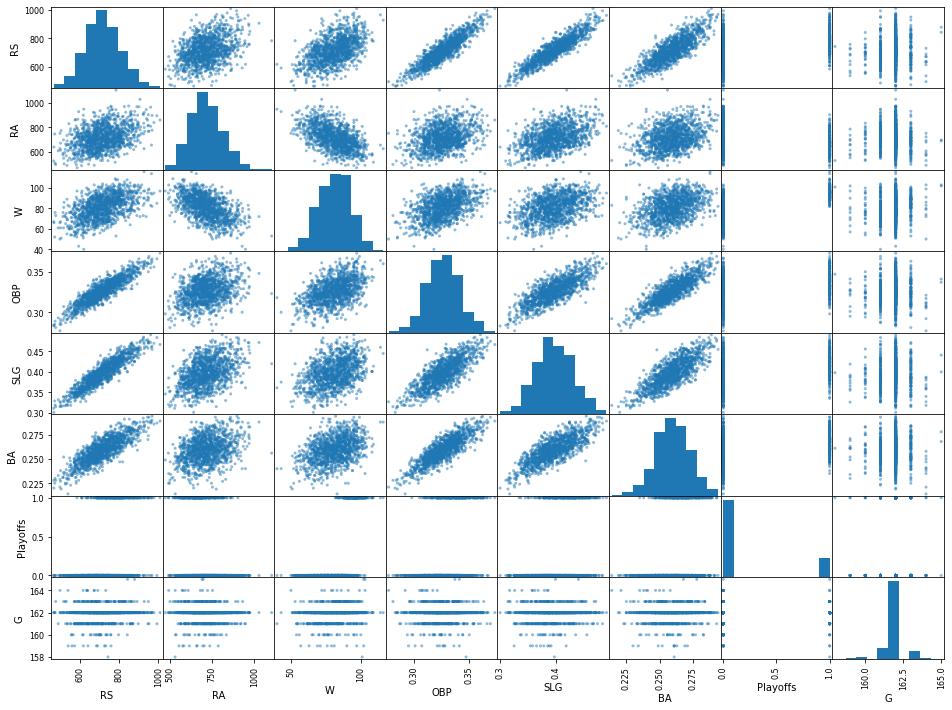

In [6]:
# Object 변수 및 불필요한 변수 제거해서 단순 시각화

selected_df = moneyball.select_dtypes(exclude=['object'])
selected_df = selected_df.drop(["Year"], axis=1)
_ = pd.plotting.scatter_matrix(selected_df, alpha = 0.5, figsize=(16,12))

## STEP 1. 시각화를 통한 데이터의 이해 
- 다양한 수치값을 갖는 변수들의 산포도를 보고 받은 통찰(insight)은 무엇인가?
- 상관관계를 보이는 데이터들은 존재하는가? 있다면 어떤 변수들이 어떤 관계에 있는지 대답하시오.
- 경기 수(G)의 히스토그램은 어떤 의미를 갖는가? 또한 다른 변수들의 히스토그램을 보고 해석하시오.

### [풀이] 
- RS 와 OBP, SLG, BA 들과 상관관계가 높은 것으로 보임
- OBP, SLG, BA 변수들도 서로 높은 상관관계를 나타내고 있음
- 경기 수(G) 는 대부분 162로 큰 의미가 없다.

## STEP 2. RS를 독립변수로 W를 예측하는 단순선형회귀 모델 생성
- 가정: 시즌 총 득점(RS)이 승리에 영향을 줄 것이다.
- RS를 독립변수로 W를 예측한 단순선형모델 직선의 기울기 $\alpha$와 절편 $\beta$는 몇인가?

$$
W = \alpha RS + \beta
$$


- 해당 모델이 얼마나 적합한지를 평가하는 $R^2$는 몇 인가?
- 적당한 모델이라고 할 수 있는가?

### [풀이] 
- 𝛼 = 0.0641, 𝛽 = 35.0964
- R-squared = 0.262
- $R^2$ 이 1에 가까울 수록 선형회귀 모형의 설명력이 높다는 것을 뜻하며 0.262 는 적당한 모델이라 할 수 없다.

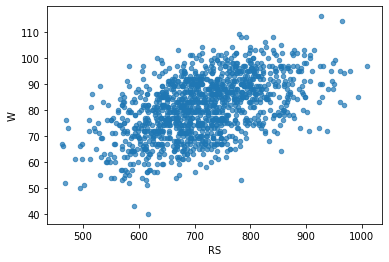

In [7]:
moneyball.plot.scatter(x = "RS", y = "W", alpha = 0.7)

In [8]:
w = moneyball['W']
rs = moneyball['RS']

In [9]:
rs1 = sm.add_constant(rs, has_constant="add")
rs1

C:\Users\drogpard\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,RS
0,1.0,734
1,1.0,700
2,1.0,712
3,1.0,734
4,1.0,613
...,...,...
1227,1.0,705
1228,1.0,706
1229,1.0,878
1230,1.0,774


In [10]:
# sm으로 fit한 모델명은 fit_simple_model 으로 하시오.
model1 = sm.OLS(w, rs1)
fit_simple_model = model1.fit()

In [11]:
fit_simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     436.4
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           3.50e-83
Time:                        16:49:55   Log-Likelihood:                -4565.1
No. Observations:                1232   AIC:                             9134.
Df Residuals:                    1230   BIC:                             9144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0964      2.211     15.876      0.000      30.759      39.434
RS             0.0641      0.003     20.890      0.000       0.058       0.070
==============================================================================
Omnibus:                       14.041   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.799
Skew:                          -0.134   Prob(JB):                      0.00452
Kurtosis:                       2.627   Cond. No.                     5.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
fit_simple_model.params

const    35.096418
RS        0.064060
dtype: float64

Text(0.5, 1.0, 'Linear Regression')

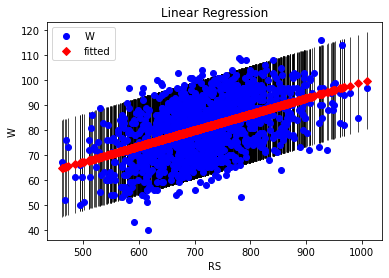

In [13]:
# 참고
# Fit된 직선 그리기. sm을 이용해서 선형회귀분석을 한 경우 
# 아래와 같이 간단한 코드로 적합된 직선과 원래 데이터의 그림을 그릴 수 있음.

fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(fit_simple_model, 1, ax=ax)
ax.set_ylabel("W")
ax.set_xlabel("RS")
ax.set_title("Linear Regression")

### Comments
- 득점 RS로 W를 예측한 단순선형회귀분석의 적합도는 만족하기 어려움(R squared 값으로 판단).
- 시즌 총 실점 RA를 독립변수로 W를 예측하는 단순선형회귀분석의 결과는 어떠한가? 만족할 만한가? 
- RS를 RA로 변경해서 기울기와 절편 및 R squared를 구해보시오. 

### [풀이] 
- 𝛼 = -0.0655, 𝛽 = 127.7690
- R-squared = 0.283
- $R^2$ 이 1에 가까울 수록 선형회귀 모형의 설명력이 높다는 것을 뜻하며 0.283 역시 적당한 모델이라 할 수 없다.

In [14]:
ra = moneyball['RA']

In [15]:
ra1 = sm.add_constant(ra, has_constant="add")
ra1

C:\Users\drogpard\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,RA
0,1.0,688
1,1.0,600
2,1.0,705
3,1.0,806
4,1.0,759
...,...,...
1227,1.0,759
1228,1.0,626
1229,1.0,690
1230,1.0,664


In [16]:
model2 = sm.OLS(w, ra1)
fit_simple_model2 = model2.fit()

In [17]:
fit_simple_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     486.5
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           4.06e-91
Time:                        16:49:56   Log-Likelihood:                -4546.8
No. Observations:                1232   AIC:                             9098.
Df Residuals:                    1230   BIC:                             9108.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        127.7690      2.143     59.634      0.000     123.566     131.973
RA            -0.0655      0.003    -22.058      0.000      -0.071      -0.060
==============================================================================
Omnibus:                        5.903   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.615
Skew:                          -0.127   Prob(JB):                       0.0604
Kurtosis:                       2.789   Cond. No.                     5.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
fit_simple_model2.params

const    127.769033
RA        -0.065538
dtype: float64

Text(0.5, 1.0, 'Linear Regression')

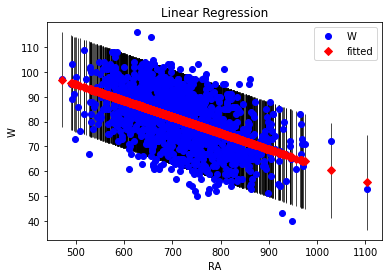

In [19]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(fit_simple_model2, 1, ax=ax)
ax.set_ylabel("W")
ax.set_xlabel("RA")
ax.set_title("Linear Regression")

## STEP 3. (RS-RA)를 독립변수로 W를 예측하는 단순선형회귀 모델 생성
- 득점과 실점이 승리 수와 관련이 없을까? 경기에서 승리하려면 상대보다 득점을 많이 해야한다. 즉, (득점 - 실점)을 새로운 독립변수로 설정하고 W를 예측하는 단순선형회귀분석을 해보시오.
- 가정: 시즌 총 득점(RS)과 실점(RA)의 차이가 승리에 영향을 줄 것이다.
- 강의 실습 시간에 학습한 statsmodels 라이브러리를 이용해서 아래의 질문에 답하시오.
- (RS-RA)를 독립변수로 W를 예측한 단순선형모델의 기울기 $\alpha$와 절편 $\beta$는 몇인가?

$$
W = \alpha \cdot (RS-RA) + \beta
$$

- 해당 모델이 얼마나 적합한지를 평가하는 $R^2$는 몇 인가?
- 적당한 모델이라고 할 수 있는가?

### [풀이] 
- 𝛼 = 0.1045, 𝛽 = 80.9042
- R-squared = 0.880
- $R^2$ 가 0.880 이므로 RS, RA 를 각각 독립변수로 예측한 모델 보다 훨씬 적당한 모델이라 할 수 있다.

In [20]:
# rd = moneyball['RS'] - moneyball['RA']
rd = pd.DataFrame(moneyball['RS'] - moneyball['RA'], columns = ['RD'])

In [21]:
rd1 = sm.add_constant(rd, has_constant="add")
rd1.head()

C:\Users\drogpard\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,RD
0,1.0,46
1,1.0,100
2,1.0,7
3,1.0,-72
4,1.0,-146


In [22]:
model3 = sm.OLS(w, rd1)
fit_simple_model3 = model3.fit()

In [23]:
fit_simple_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     8983.
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:49:56   Log-Likelihood:                -3448.3
No. Observations:                1232   AIC:                             6901.
Df Residuals:                    1230   BIC:                             6911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.9042      0.113    713.853      0.000      80.682      81.127
RD             0.1045      0.001     94.778      0.000       0.102       0.107
==============================================================================
Omnibus:                        0.797   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.671   Jarque-Bera (JB):                0.686
Skew:                          -0.041   Prob(JB):                        0.710
Kurtosis:                       3.081   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
fit_simple_model3.params

const    80.904221
RD        0.104548
dtype: float64

Text(0.5, 1.0, 'Linear Regression')

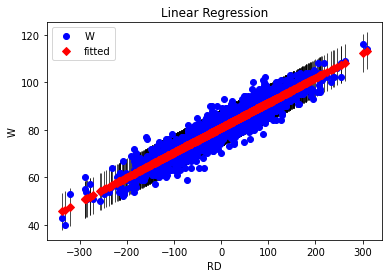

In [25]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(fit_simple_model3, 1, ax=ax)
ax.set_ylabel("W")
ax.set_xlabel("RD")
ax.set_title("Linear Regression")

In [26]:
print(fit_simple_model.params)
print(fit_simple_model2.params)
print(fit_simple_model3.params) ##단순선형회귀분석의 회귀 계수(R2)와 비교

const    35.096418
RS        0.064060
dtype: float64
const    127.769033
RA        -0.065538
dtype: float64
const    80.904221
RD        0.104548
dtype: float64


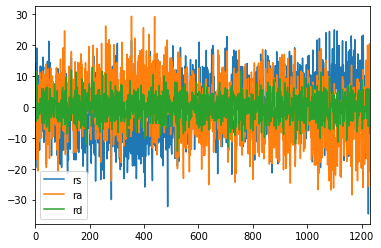

In [27]:
fit_simple_model.resid.plot(label="rs")
fit_simple_model2.resid.plot(label="ra")
fit_simple_model3.resid.plot(label="rd")
plt.legend()

## STEP 4. 회귀분석 결과의 해석
- 득점과 실점이 개별적으로 한 개씩만 본다면 승리 예측에 큰 영향을 주지 못하지만 (득점 - 실점)으로 결합한 변수는 승리 예측에 유의미하게 영향을 주었다. 이런 작용은 무엇이라고 하는가?
- 다시 RS, RA를 두 개의 독립변수로 W를 예측한 선형모델의 기울기 $\alpha_1$, $\alpha_2$와 절편 $\beta$는 몇인가?

$$
W = \alpha_1 RS + \alpha_2 RA + \beta
$$

- RS, RA를 두 개의 독립변수로 W를 예측한 모델과 (RS-RA)을 독립변수로 W를 예측한 모델은 무슨 차이가 있을까?
- 회귀분석 결과인 $\alpha_1$, $\alpha_2$와 (RS-RA)의 계수인 $\alpha$를 비교해보고 RS와 RA의 차이가 승리에 큰 영향을 미친다고 결론 내릴 수 있는가?

### [풀이] 
- 교호작용(Interaction term)
- 𝛼1 = 0.1045 , 𝛼2 = -0.1046, 𝛽 = 80.9805
- R-squared = 0.880

In [28]:
x_data = moneyball[['RS', 'RA']]
x_data.head()

,RS,RA
0,734,688
1,700,600
2,712,705
3,734,806
4,613,759


In [29]:
#상수항 추기
x_data1 = sm.add_constant(x_data, has_constant="add")

C:\Users\drogpard\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [30]:
# 회귀모델 적합
multi_model = sm.OLS(w, x_data1)
fitted_multi_model = multi_model.fit()

In [31]:
# summary함수를 통해 결과출력 
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     4488.
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:49:57   Log-Likelihood:                -3448.3
No. Observations:                1232   AIC:                             6903.
Df Residuals:                    1229   BIC:                             6918.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.9805      1.064     76.111      0.000      78.893      83.068
RS             0.1045      0.001     77.995      0.000       0.102       0.107
RA            -0.1046      0.001    -79.393      0.000      -0.107      -0.102
==============================================================================
Omnibus:                        0.802   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.670   Jarque-Bera (JB):                0.691
Skew:                          -0.041   Prob(JB):                        0.708
Kurtosis:                       3.081   Cond. No.                     9.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
fitted_multi_model.params

const    80.980456
RS        0.104493
RA       -0.104600
dtype: float64

In [33]:
from numpy import linalg ##행렬연산을 통해 beta구하기 
ba = linalg.inv((np.dot(x_data1.T, x_data1))) ## (X'X)-1
np.dot(np.dot(ba,x_data1.T), w) ##(X'X)-1X'y

array([80.98045556,  0.10449347, -0.10460008])

In [34]:
pred4 = fitted_multi_model.predict(x_data1)

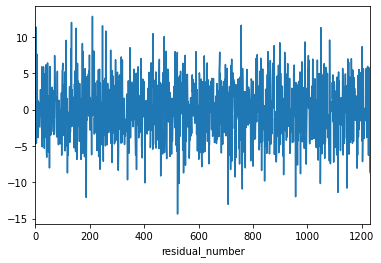

In [35]:
fitted_multi_model.resid.plot()
plt.xlabel("residual_number")
plt.show()

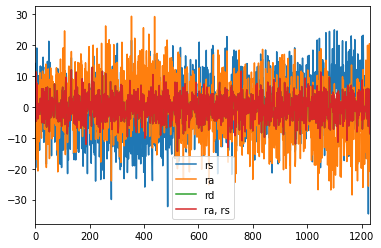

In [36]:
fit_simple_model.resid.plot(label="rs")
fit_simple_model2.resid.plot(label="ra")
fit_simple_model3.resid.plot(label="rd")
fitted_multi_model.resid.plot(label="ra, rs")
plt.legend()

## STEP 5. 모든 변수를 활용한 다중회귀분석 및 다중공선성 문제
- [RS, RA, OBP, SLG, BA, G] 6개 독립변수로 W를 예측하는 다중회귀분석 하시오.
- RS, RA 두 독립변수의 모델과 비교했을 때 결과가 향상됐다고 할 수 있는가?
- 결과가 향상되지 않았다면 다중공선성 문제가 있을 수 있다고 판단할 수 있는데 정량적인 수치로 확인해보시오. VIF를 구하고 결과를 해석하시오(특별히 RS의 VIF 수치가 높게 나온 이유를 한번 생각해 보시오).
    - RS, RA 두 변수로도 충분히 W를 설명 가능했었습니다. 이를 어떻게 해석해야 할까요?
    - G의 VIF 수치는 어떻게 해석해야 할까요? 가장 낮은 VIF가 예측에 중요한 변수인가요?
- 주의 statsmodels에는 항상 상수항을 넣어주어야 한다. VIF도 마찬가지임. [참고](https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python)
- 강의 실습 때 다룬 전진선택법을 사용해서 AIC가 가장 작은 값이 나오는 독립변수를 찾으시오.

### [풀이] 
- R-squared 가 0.881 로 비슷하며 변수가 증가하면 SSR이 증가하고 𝑅2 또한 증가하기 때무에 결과가 향상 되었다고 말하기 어렵다.
- W를 설명 하는데 여러 변수들이 변동성이 겹치며 겹치는 변동성에 대해서는 중복으로 가져가지 못한다.
- VIF 를 보면 OBP, SLG, BA 이 변수들이 비교적 높은 상관관계를 나타내고 있으며 RS 변수와 서로 높은 다중공선성 문제를 나타낸다.
- 따라서 출루율(OBP), 장타율(SLG), 타율(BA) 이 높다는 것은 높은 득점수(RS) 로 이어진다고 볼 수 있다.
- 이 와 같이 변동성이 겹치는 변수들을 제거하고 RS, RA 두 변수로도 충분히 W의 변동성을 나타낼 수 있다.
- 경기 수(G) 는 대부분 162로 큰 의미가 없으며 VIF 가 가장 낮다고 하여 중요한 변수는 아님

In [37]:
x_data_S5 = moneyball[['RS','RA','OBP','SLG','BA','G']] ##변수 여러개
x_data_S5.head()

,RS,RA,OBP,SLG,BA,G
0,734,688,0.328,0.418,0.259,162
1,700,600,0.320,0.389,0.247,162
2,712,705,0.311,0.417,0.247,162
3,734,806,0.315,0.415,0.260,162
4,613,759,0.302,0.378,0.240,162


In [38]:
x_data_S5_2 = sm.add_constant(x_data_S5, has_constant='add')

C:\Users\drogpard\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [39]:
multi_model_S5 = sm.OLS(w,x_data_S5_2)
fitted_multi_model_S5 = multi_model_S5.fit()

In [40]:
fitted_multi_model_S5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1514.
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:49:57   Log-Likelihood:                -3440.1
No. Observations:                1232   AIC:                             6894.
Df Residuals:                    1225   BIC:                             6930.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.0766     30.741     -0.393      0.695     -72.388      48.235
RS             0.0912      0.005     19.957      0.000       0.082       0.100
RA            -0.1050      0.001    -77.700      0.000      -0.108      -0.102
OBP           58.5427     20.365      2.875      0.004      18.588      98.497
SLG           22.9386      9.409      2.438      0.015       4.480      41.397
BA           -27.0409     17.942     -1.507      0.132     -62.241       8.159
G              0.5040      0.184      2.742      0.006       0.143       0.865
==============================================================================
Omnibus:                        0.385   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.825   Jarque-Bera (JB):                0.297
Skew:                          -0.025   Prob(JB):                        0.862
Kurtosis:                       3.057   Cond. No.                     2.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

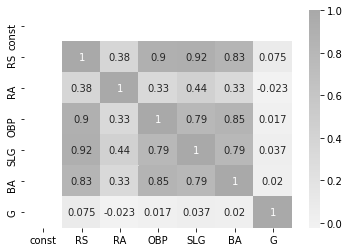

In [41]:
## 상관행렬 시각화 해서 보기 
import seaborn as sns;
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(x_data_S5_2.corr(), annot=True, cmap=cmap)
plt.show()

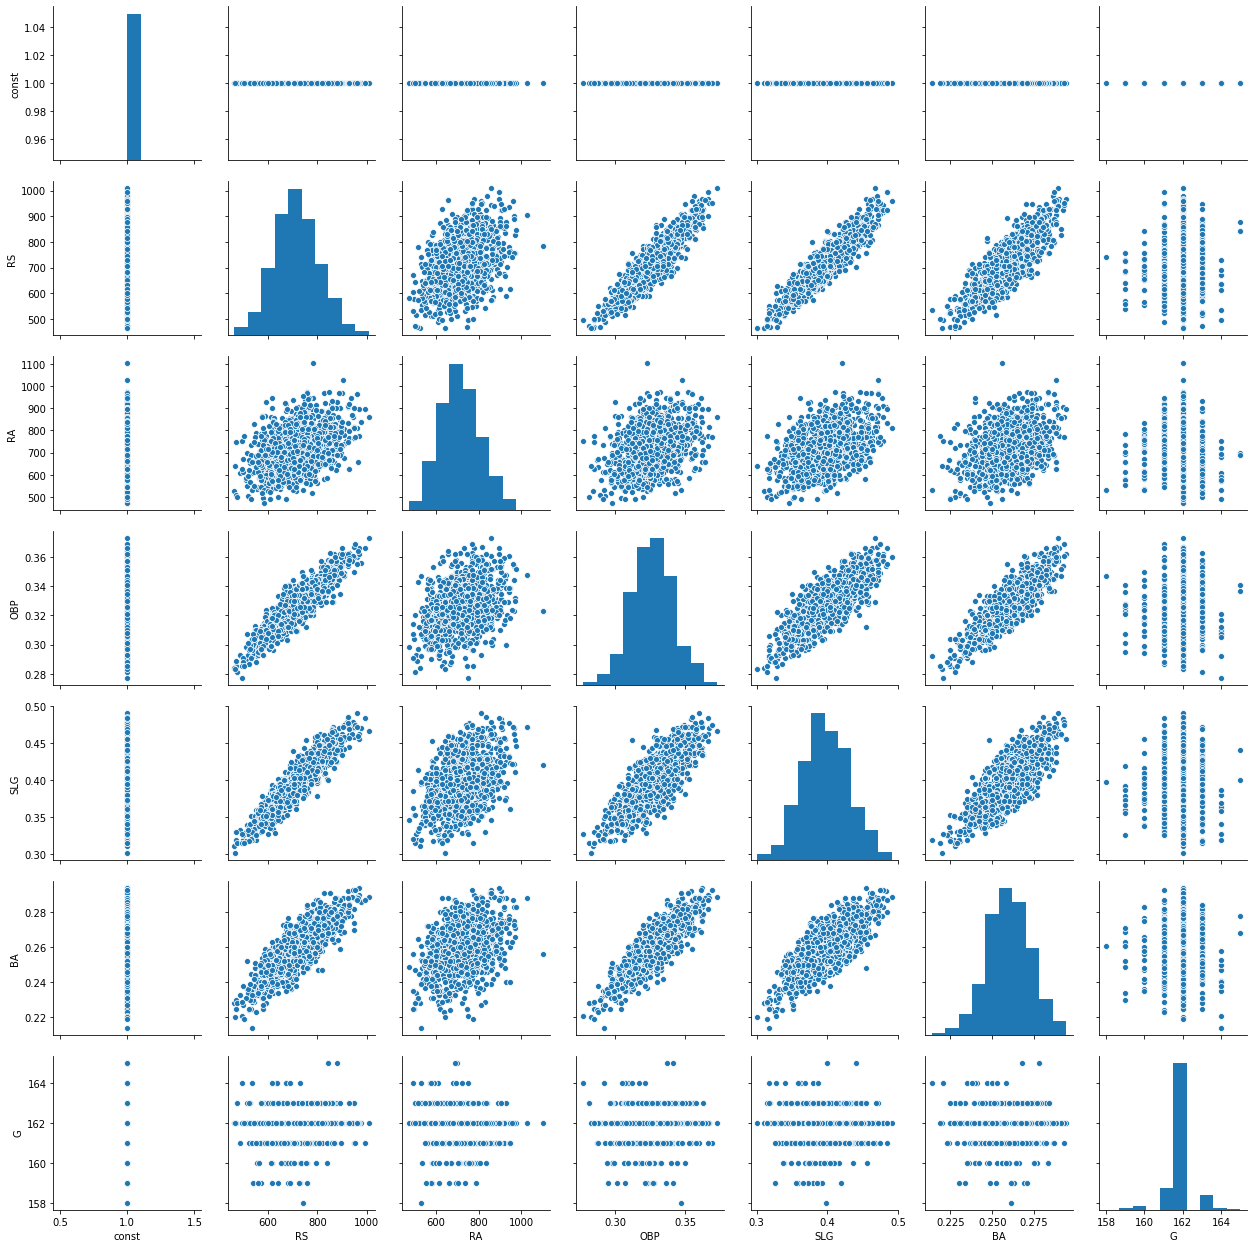

In [42]:
## 변수별 산점도 시각화
sns.pairplot(x_data_S5_2)
plt.show()

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data_S5_2.values, i) for i in range(x_data_S5_2.shape[1])]
vif["features"] = x_data_S5_2.columns
vif

,VIF Factor,features
0,74248.579971,const
1,13.745013,RS
2,1.241633,RA
3,7.338020,OBP
4,7.690644,SLG
5,4.209910,BA
6,1.033843,G


In [44]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}

# feature_columns = list(x_data_S5_2.columns)
# print(processSubset(X=x_data_S5_2, y=w, feature_set = feature_columns[0:7]))

In [45]:
import time
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [46]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        print('AIC:',Forward_result['AIC'])
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [47]:
Forward_best_model = forward_model(X=x_data_S5_2, y= w)

Processed  6 models on 1 predictors in 0.015956878662109375
Selected predictors: ['RA', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002E949E27488>
AIC: 9097.598863115662
Processed  5 models on 2 predictors in 0.00797724723815918
Selected predictors: ['RA', 'RS', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002E949C5BC88>
AIC: 6902.513504325496
Processed  4 models on 3 predictors in 0.00797891616821289
Selected predictors: ['RA', 'RS', 'G', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002E949E2EA88>
AIC: 6899.191986626114
Processed  3 models on 4 predictors in 0.005984306335449219
Selected predictors: ['RA', 'RS', 'G', 'OBP', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002E949E216C8>
AIC: 6897.052145582751
Processed  2 models on 5 predictors in 0.00498652458190918
Selected predictors: ['RA', 'RS', 'G

C:\Users\drogpard\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  from ipykernel import kernelapp as app


In [48]:
Forward_best_model.aic

6894.258422266606

In [49]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1514.
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:50:09   Log-Likelihood:                -3440.1
No. Observations:                1232   AIC:                             6894.
Df Residuals:                    1225   BIC:                             6930.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RA            -0.1050      0.001    -77.700      0.000      -0.108      -0.102
RS             0.0912      0.005     19.957      0.000       0.082       0.100
G              0.5040      0.184      2.742      0.006       0.143       0.865
OBP           58.5427     20.365      2.875      0.004      18.588      98.497
SLG           22.9386      9.409      2.438      0.015       4.480      41.397
BA           -27.0409     17.942     -1.507      0.132     -62.241       8.159
const        -12.0766     30.741     -0.393      0.695     -72.388      48.235
==============================================================================
Omnibus:                        0.385   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.825   Jarque-Bera (JB):                0.297
Skew:                          -0.025   Prob(JB):                        0.862
Kurtosis:                       3.057   Cond. No.                     2.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

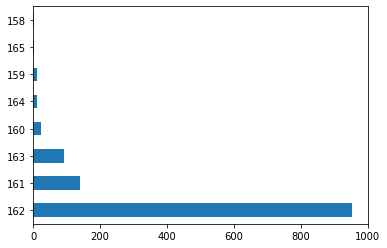

In [50]:
# 참고: 경기수 G 히스토그램
moneyball["G"].value_counts().plot.barh()
# 대부분 162 근처에 있음

In [51]:
# 참고로 선형회귀분석의 다양한 통계적인 결과 수치를 원치 않는 경우
# sklearn을 이용해서 손쉽게 회귀분석 모델을 만들 수 있다.

from sklearn.linear_model import LinearRegression

# Fit 할 때 상수항을 따로 추가할 필요 없음
reg = LinearRegression().fit(moneyball[["RS", "RA"]], moneyball["W"])
print("r squared:", reg.score(moneyball[["RS", "RA"]], moneyball["W"]))
print("coefficients: ", reg.coef_)
print("intercept: ", reg.intercept_)

r squared: 0.8795651418768365
coefficients:  [ 0.10449347 -0.10460008]
intercept:  80.98045555972712


## STEP 6. 로지스틱회귀 모델 생성
- RS와 RA 두 독립변수로 플레이오프(Playoffs) 진출 여부를 결정하는 로지스틱회귀분석 모델을 생성해보시오.
- Confusion matrix, AUC, ROC 곡선을 이용해서 결과를 해석해 보시오.
- 참고
    - [Scikit learn confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    - [Model Evaluation Techniques for Classification models](https://towardsdatascience.com/model-evaluation-techniques-for-classification-models-eac30092c38b)
    - [Evaluating a Classification Model]()

### [풀이] 
- 정확도 ACC 는 0.885551948051948
- ROC 커브는 왼쪽 모서리 쪽으로 가까울 수록 성능이 좋음
- AUC 는 0과 1사이의 값을 가지는 그래프의 면적 값이다.

In [52]:
# 플레이오프 진출 여부: 1 or 0
y = moneyball['Playoffs']
y

0       0
1       1
2       1
3       0
4       0
       ..
1227    0
1228    0
1229    1
1230    0
1231    0
Name: Playoffs, Length: 1232, dtype: int64

In [53]:
## 로지스틱 모형 적합 
model = sm.Logit(y, x_data1)
fit_logit = model.fit(method="newton")

Optimization terminated successfully.
         Current function value: 0.256725
         Iterations 8


In [54]:
fit_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Playoffs   No. Observations:                 1232
Model:                          Logit   Df Residuals:                     1229
Method:                           MLE   Df Model:                            2
Date:                Mon, 28 Sep 2020   Pseudo R-squ.:                  0.4842
Time:                        16:50:11   Log-Likelihood:                -316.28
converged:                       True   LL-Null:                       -613.15
Covariance Type:            nonrobust   LLR p-value:                1.178e-129
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0982      0.980     -5.200      0.000      -7.020      -3.177
RS             0.0327      0.002     14.422      0.000       0.028       0.037
RA            -0.0300      0.002    -13.465      0.000      -0.034      -0.026
==============================================================================
"""

In [55]:
fit_logit.params

const   -5.098231
RS       0.032685
RA      -0.029999
dtype: float64

In [56]:
np.exp(fit_logit.params)

const    0.006108
RS       1.033225
RA       0.970446
dtype: float64

In [57]:
## y_hat 예측
pred_y = fit_logit.predict(x_data1)
pred_y

0       0.148442
1       0.445659
2       0.048525
3       0.005032
4       0.000397
          ...   
1227    0.007965
1228    0.309577
1229    0.947836
1230    0.569673
1231    0.000912
Length: 1232, dtype: float64

In [58]:
def cut_off(y,threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

pred_Y = cut_off(pred_y,0.5)
pred_Y

0       0
1       0
2       0
3       0
4       0
       ..
1227    0
1228    0
1229    1
1230    1
1231    0
Length: 1232, dtype: int32

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm

# confusion matrix
cfmat = confusion_matrix(y, pred_Y)
print(cfmat)

[[940  48]
 [ 93 151]]


In [60]:
(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat) ## accuracy

0.885551948051948

In [61]:
def acc(cfmat) :
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat) ## accuracy
    return(acc)

In [62]:
acc(cfmat)

0.885551948051948

In [63]:
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(y, pred_Y)
    table.loc[i] = acc(cfmat)
table.index.name='threshold'
table.columns.name='performance'
table

performance,ACC
threshold,
0.0,0.198052
0.1,0.780844
0.2,0.839286
0.3,0.870942
0.4,0.885552
0.5,0.885552
0.6,0.873377
0.7,0.866071
0.8,0.855519


AUC: 0.9330428253799695


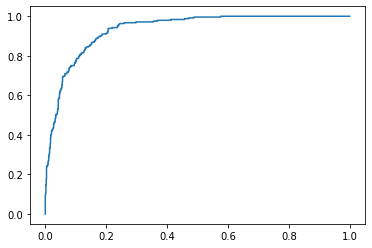

In [64]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(y, pred_y, pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)


In [65]:
# 참고로 선형회귀분석과 마찬가지로 sklearn을 이용해서 손쉽게 회귀분석 모델을 만들 수 있다.
# 위 결과와 비교해보시오.

from sklearn.linear_model import LogisticRegression

# Fit 할 때 상수항을 따로 추가할 필요 없음
reg = LogisticRegression().fit(moneyball[["RS", "RA"]], moneyball["Playoffs"])
print("mean accuracy:", reg.score(moneyball[["RS", "RA"]], moneyball["Playoffs"]))
print("coefficients: ", reg.coef_)
print("intercept: ", reg.intercept_)

mean accuracy: 0.8758116883116883
coefficients:  [[ 0.02833851 -0.03250847]]
intercept:  [-0.08637473]


C:\Users\drogpard\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Comments
- 로지스틱회귀분석은 주어진 독립변수의 공간을 선형으로 분리한다고 수학적으로 해석할 수 있다. 조금 더 자세히 설명하면 로지스틱회귀분석의 결과로 우리는 아래 식의 계수들 $\alpha_1, \alpha_2, \beta$를 얻었다. 플레이오프의 진출 여부를 0 ~ 1사이의 확률 값으로 출력하는 식이 로지스틱회귀분석의 결과이다. 여기서 진출 여부의 판단 기준을 $1/2$로 한다고 가정해보자(일반적으로 $1/2$ 확률로 판단하지만 모델이나 상황에 따라서 조절할 수도 있다).

$$
\text{Playoffs} = \frac{1}{1 + e^{(\alpha_1 RS + \alpha_2 RA + \beta)}}
$$

- 왼쪽 플레이오프 진출 확률을 1/2로 두고 식을 정리하면 다음과 같다.

$$
\alpha_1 RS + \alpha_2 RA + \beta = 0
$$

- 결과적으로 위 식을 만족하는 RS와 RA 값들은 아래와 같은 빨간색 선과 같은 직선의 형태를 띤다. 직선(선형)을 기준으로 한쪽 영역은 플레이오프 진출 못함, 반대쪽은 플레이오프 진출함으로 판단되는 것이다(물론 로지스틱회귀분석모델의 판단). 

![](https://mjgim-fc.s3.ap-northeast-2.amazonaws.com/logistic.png)


- 이처럼 로지스틱회귀분석은 주어진 독립변수 공간을 선형으로 분리해서 이진 분류하는 방식이기 때문에 XOR 문제를 해결하기 어려운 것이다(XOR은 선형으로 해결 불가능). 그림 출처: https://web.stanford.edu/~jurafsky/slp3/7.pdf

![](https://mjgim-fc.s3.ap-northeast-2.amazonaws.com/xor.png)

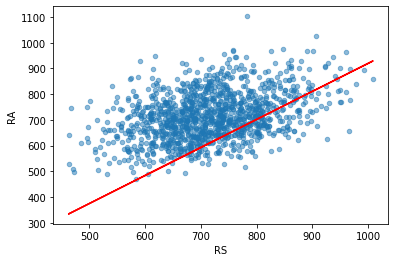

In [66]:
line_x = moneyball["RS"]

line_y = (- fit_logit.params["RS"] * moneyball["RS"]  - fit_logit.params["const"] ) \
          / fit_logit.params["RA"]

moneyball.plot.scatter(x = "RS", y = "RA", alpha = 0.5)
plt.plot(line_x, line_y, "r")

## STEP 7. 변수 선택법으로 로지스틱회귀분석 정확도 올리기
- RS, RA, OBP, SLG, BA, G을 독립변수를 사용해서(상수항 포함) 플레이오프 진출 여부를 결정하는 로지스틱회귀분석 모델을 만들어 보시오.
- 후진소거법으로 최적의 독립변수를 찾아 보시오(AIC 값이 크게).

### [풀이] 
- 정확도 ACC 는 0.8806818181818182

In [67]:
## 로지스틱 모형 적합 
# 상수항 추가된 x_data_S5_2 변수 사용
model2 = sm.Logit(y, x_data_S5_2)
fit_logit2 = model2.fit(method="newton")

Optimization terminated successfully.
         Current function value: 0.253002
         Iterations 9


In [68]:
fit_logit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Playoffs   No. Observations:                 1232
Model:                          Logit   Df Residuals:                     1225
Method:                           MLE   Df Model:                            6
Date:                Mon, 28 Sep 2020   Pseudo R-squ.:                  0.4916
Time:                        16:50:12   Log-Likelihood:                -311.70
converged:                       True   LL-Null:                       -613.15
Covariance Type:            nonrobust   LLR p-value:                5.493e-127
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0517     29.004     -0.243      0.808     -63.899      49.795
RS             0.0230      0.004      5.311      0.000       0.015       0.031
RA            -0.0311      0.002    -13.331      0.000      -0.036      -0.026
OBP           44.8459     18.453      2.430      0.015       8.679      81.013
SLG           18.9428      8.276      2.289      0.022       2.722      35.163
BA           -22.7653     15.575     -1.462      0.144     -53.292       7.761
G             -0.0411      0.173     -0.238      0.812      -0.380       0.298
==============================================================================
"""

In [69]:
fit_logit2.params

const    -7.051707
RS        0.022982
RA       -0.031057
OBP      44.845883
SLG      18.942805
BA      -22.765310
G        -0.041106
dtype: float64

In [70]:
np.exp(fit_logit2.params)

const    8.659293e-04
RS       1.023248e+00
RA       9.694204e-01
OBP      2.994466e+19
SLG      1.685605e+08
BA       1.297631e-10
G        9.597272e-01
dtype: float64

In [71]:
## y_hat 예측
pred_y_2 = fit_logit2.predict(x_data_S5_2)
pred_y_2

0       0.185768
1       0.459821
2       0.046554
3       0.003003
4       0.000351
          ...   
1227    0.008395
1228    0.244520
1229    0.903122
1230    0.433377
1231    0.000916
Length: 1232, dtype: float64

In [72]:
pred_Y_2 = cut_off(pred_y_2,0.5)
pred_Y_2

0       0
1       0
2       0
3       0
4       0
       ..
1227    0
1228    0
1229    1
1230    0
1231    0
Length: 1232, dtype: int32

In [73]:
# confusion matrix
cfmat2 = confusion_matrix(y, pred_Y_2)
print(cfmat2)

[[938  50]
 [ 97 147]]


In [74]:
acc(cfmat2)

0.8806818181818182

In [75]:
threshold2 = np.arange(0,1,0.1)
table2 = pd.DataFrame(columns=['ACC'])
for i in threshold2:
    pred_Y_2 = cut_off(pred_y_2,i)
    cfmat2 = confusion_matrix(y, pred_Y_2)
    table2.loc[i] = acc(cfmat2)
table2.index.name='threshold'
table2.columns.name='performance'
table2

performance,ACC
threshold,
0.0,0.198052
0.1,0.779221
0.2,0.840909
0.3,0.876623
0.4,0.885552
0.5,0.880682
0.6,0.879870
0.7,0.871753
0.8,0.854708


AUC: 0.9345838587641866


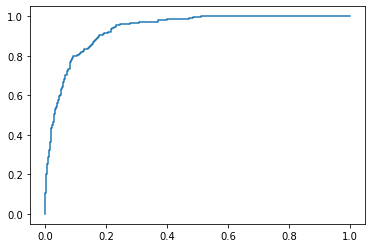

In [76]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(y, pred_y_2, pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

In [77]:
# Fit 할 때 상수항을 따로 추가할 필요 없음
reg2 = LogisticRegression().fit(moneyball[['RS','RA','OBP','SLG','BA','G']], moneyball["Playoffs"])
print("mean accuracy:", reg2.score(moneyball[['RS','RA','OBP','SLG','BA','G']], moneyball["Playoffs"]))
print("coefficients: ", reg2.coef_)
print("intercept: ", reg2.intercept_)

mean accuracy: 0.8863636363636364
coefficients:  [[ 3.26987675e-02 -2.99923253e-02 -2.59382456e-05  5.58227227e-06
  -3.29660009e-05 -3.15644417e-02]]
intercept:  [-0.00019282]


C:\Users\drogpard\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [78]:
def processSubset(X,y, feature_set):
            model = sm.Logit(y,X[list(feature_set)])
            regr = model.fit()
            AIC = regr.aic
            return {"model":regr, "AIC":AIC}

import itertools

'''
후진소거법
'''
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model


def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=X, y= y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        print('AIC:',Backward_result['AIC'])
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [79]:
Backward_best_model = backward_model(X=x_data_S5_2,y=y)

Optimization terminated successfully.
         Current function value: 0.253026
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.255159
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.265441
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.414357
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.255423
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.253025
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.253873
         Iterations 9
Processed  6 models on 5 predictors in 0.029918670654296875
Selected predictors: ['BA', 'OBP', 'RA', 'RS', 'SLG', 'const']  AIC: <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x000002E94C9AA2C8>
AIC: 635.453294139449
Optimization terminated successfully.
         

C:\Users\drogpard\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


## 참고
- 통계 라이브러리에 특화(?)된 R에서는 회귀분석 모델 생성, 변수선택법, VIF 등 통계분석을 쉽게 수행할 수 있다.
- 위에서 수행했던 내용을 R로 실행한 내용입니다.
- [R vs Python 회귀분석모델](https://s3.ap-northeast-2.amazonaws.com/mjgim.assets/2.+Regression+in+R.html)